# *Trabajo pŕactico organización de datos*

## 1.  Intoducción

Este trabajo consiste en realizar un análisis profundo sobre un determinado set de datos para de esta manera afianzar los contenídos vistos durante el curso. 
El trabajo se dividirá en diferentes secciones para facilitar su lectura y mantener un orden a la hora de sacar conclusiones.

## 2. Importación de librerías

En esta sección se importaran las librerías cuyas herramientas utilizaremos en el trancurso de todo el trabajo.

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#%matplotlib inline

#plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

#sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos y primeras impresiones

### 3.1 Lectura de los datos

Se dispone de un archivo csv que nos brinda información sobre propiedades en venta en el país de Mexico. Cada linea del archivo nos da información sobre una de las propiedades. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluída en el archivo. Se tratará a los datos como un Dataframe.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### 3.2 Dimensiones del Dataframe

In [4]:
dimensiones= df.shape
print("Cantidad de filas:", dimensiones[0])
print("Cantidad de columnas:", dimensiones[1])
print("Tamaño del Dataframe:", df.size)

Cantidad de filas: 240000
Cantidad de columnas: 23
Tamaño del Dataframe: 5520000


### 3.3 Caracterísitcas principales del Dataframe

Se incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna. A su vez conocemos tambien los tipos de datos con los que estaremos trabjando.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## 4. Análisis de Datos

En las secciones anteriores se realizó la carga de los datos y se obtubo información general del Dataframe de manera tal de familiarizarnos con la información con la que se estará trabajando durante el trabajo práctico. A partir de ahora se comenzará con el análisis de dichos datos donde iremos explorando el Dataframe para obtener resultados que nos permitan sacar conclusiones sobre la venta de propiedades en México.

### 4.1 Cantidad de propiedades:

Es interesante conocer la cantidad de propiedades de la que disponemos. Como cada fila del Dataframe se corresponde con una propiedad, la cantidad de propiedades se corresponde con la cantidad de filas del dataframe:


In [6]:
print("Cantidad de propiedades:", dimensiones[0])

Cantidad de propiedades: 240000


### 4.2 Tipo de propiedades:

Las propiedades en venta pueden ser de diferentes tipos. A continuación se muestran cuales son los tipo de propiedadas con los que estaremos trabajando como tambien la cantidad de propiedades en venta de cada uno de ellos.

In [7]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [8]:
print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");
#roba3 del tutorial, no cuenta

Total tipos de propiedad: 24


## 4.3 Ubicación de las propiedades

### 4.3.1 Cantidad de propiedades por provincia

Vimos que el set de datos se corresponde a propiedades en venta distribuídas en el país de México. Este país divide en provincias. Veamos cuantas propiedades hay por cada provincia:

In [9]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Total de provincias: 32


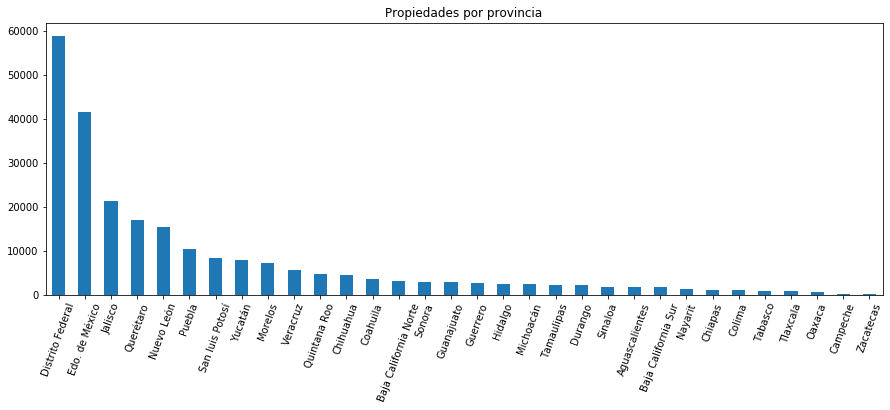

In [10]:
print(f"Total de provincias: {df.provincia.nunique()}")
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");
#robado parte 2

### 4.3.2 Cantidad de propiedades por ciudad

Las provincias se dividen en ciudades. Veamos para cada provincia cuantas propiedades en venta hay en cada ciudad.

In [11]:
#provincias = df["provincia"].dropna().unique()
#for provincia in provincias:
#    print( "\nPROVINCIA: " + str(provincia))
#    datosfiltrados= df.loc[df.provincia == provincia, :]
#    print(datosfiltrados["iremosciudad"].value_counts())
#    print("TOTAL: " + str(datosfiltrados.shape[0]))
    
#o tambien podriamos hacerlo asi
grouped = df.groupby(['provincia','ciudad']).agg({'ciudad':'size'})
grouped.columns = ['Propiedades por ciudad']

grouped

Propiedades por ciudad
provincia             ciudad                                           
Aguascalientes        Aguascalientes                               1451
                      Asientos                                        5
                      Calvillo                                        3
                      Cosío                                           3
                      El Llano                                        3
                      Jesús María                                   267
                      Pabellón de Arteaga                             4
                      Rincón de Romos                                 3
                      San Francisco de los Romo                      11
                      Tepezalá                                        3
Baja California Norte Ensenada                                       83
                      Mexicali                                      236
                      Playas de Rosarito                             21
                      Tecate                                         17
                      Tijuana                                      2863
Baja California Sur   Comondú                                         6
                      La Paz                                        930
                      Loreto                                          4
                      Los Cabos                                     759
                      Mulegé                                          1
Campeche              Calkiní                                         3
                      Campeche                                      147
                      Carmen                                        107
                      Champotón                                       3
                      Escárcega                                       1
                      Hopelchén                                       1
                      Palizada                                        1
Chiapas               Bella Vista                                     1
                      Berriozábal                                    16
                      Chiapa de Corzo                                14
...                                                                 ...
Yucatán               Suma                                            1
                      Tahmek                                          1
                      Teabo                                           1
                      Tekax                                           2
                      Telchac Pueblo                                  6
                      Telchac Puerto                                 65
                      Temax                                           1
                      Temozón                                        21
                      Timucuy                                         1
                      Tinum                                           1
                      Tizimín                                        10
                      Tzucacab                                        1
                      Uayma                                           1
                      Ucú                                             1
                      Umán                                           11
                      Valladolid                                      9
                      Yaxcabá                                         1
                      Yaxkukul                                        1
                      Yobaín                                          5
Zacatecas             Calera                                          3
                      Fresnillo                                       1
                      Guadalupe                                      40
                      Jerez                                           5
                 

### 4.3.3 ¿Cuáles son las provincias con mayor cantidad de algún tipo de propiedad?

Es interesante conocer cuales son las provincias que tiene mayor cantidad de propiedades de algún tipo en específico en venta. A modo de ejemplo veamos el top 3 de las provincias con mayor cantidad de casas en venta.

In [12]:
print(" Las 3 provincias con mayor cantidad de casas en venta son: ")
df.loc[df.tipodepropiedad == "Casa", : ]["provincia"].value_counts().head(3)

 Las 3 provincias con mayor cantidad de casas en venta son: 


Edo. de México      25938
Distrito Federal    15812
Jalisco             14196
Name: provincia, dtype: int64

Otro ejemplo podría ser conocer cual es la provincia con mayor cantidad de huertas en venta.

In [13]:
print(" La provincia con mayor cantidad de Huertas en venta es:")
df.loc[df.tipodepropiedad == "Huerta", :]["provincia"].value_counts().head(1)

 La provincia con mayor cantidad de Huertas en venta es:


Chihuahua    7
Name: provincia, dtype: int64

Supongamos ahora que queremos generalizarlo y calculemos para cada tipo de propiedad cuál es la provincia que tiene mayor cantidad de propiedades en venta de cada tipo.

In [14]:
tipos = df["tipodepropiedad"].dropna().unique()
for tipo in tipos:
    print ("\nTIPO: " + tipo)
    print(df.loc[df.tipodepropiedad == tipo, :]["provincia"].value_counts().head(1))
    
#dfaux = df.groupby(['tipodepropiedad','provincia'])\
#    .agg({ 'tipodepropiedad':'size'}) #necesito averiguar como quedarme con 
                                       #el mayor de cada zona y ya está
#dfaux


TIPO: Apartamento
Distrito Federal    33839
Name: provincia, dtype: int64

TIPO: Casa en condominio
Edo. de México    4717
Name: provincia, dtype: int64

TIPO: Casa
Edo. de México    25938
Name: provincia, dtype: int64

TIPO: Terreno
Distrito Federal    1677
Name: provincia, dtype: int64

TIPO: Terreno comercial
San luis Potosí    234
Name: provincia, dtype: int64

TIPO: Local Comercial
Distrito Federal    471
Name: provincia, dtype: int64

TIPO: Quinta Vacacional
Nuevo León    205
Name: provincia, dtype: int64

TIPO: Oficina comercial
Distrito Federal    736
Name: provincia, dtype: int64

TIPO: Edificio
Distrito Federal    616
Name: provincia, dtype: int64

TIPO: Casa uso de suelo
Distrito Federal    277
Name: provincia, dtype: int64

TIPO: Local en centro comercial
Jalisco    54
Name: provincia, dtype: int64

TIPO: Bodega comercial
Distrito Federal    322
Name: provincia, dtype: int64

TIPO: Otros
Querétaro    34
Name: provincia, dtype: int64

TIPO: Villa
Guerrero    90
Name: provin

### 4.3.4 Antiguedad de propiedades segun provincia

In [15]:
#provincias= df['provincia'].dropna().unique()
#dfaux= df.groupby(['provincia'])
#for provincia in provincias:
#    print ("\nProvincia: " + str(provincia))
#    print( "promedio de antiguedad:" + str(dfaux.get_group(provincia)['antiguedad'].mean()) + " años")

    
antiguedad_por_zona = df.groupby('provincia').agg({'antiguedad': ['mean', 'size']})
antiguedad_por_zona.columns = ['antiguedad_mean','antiguedad_size']
antiguedad_por_zona.sort_values('antiguedad_mean', ascending=False)
#hacer grafico y luego otro grafico que muestre la relacion entre la antiguedad/precio

,antiguedad_mean,antiguedad_size
provincia,,
Distrito Federal,12.19,58790
Edo. de México,10.03,41607
Guerrero,7.61,2678
Nuevo León,7.54,15324
Aguascalientes,7.52,1753
Michoacán,7.06,2471
Jalisco,6.64,21238
Chihuahua,6.52,4590
Morelos,6.46,7337


### 4.3.5 Metros por provincia

Ahora analizaremos cuales son las provincias con las propiedas con mas metros en total (soy malisimo
para las descripcionas...mejorar)

In [16]:
tamaño_por_zona = df.groupby('provincia').agg({'metrostotales': ['sum', 'mean', 'size']})
tamaño_por_zona.columns = ['metros_sum', 'metros_mean','size']
tamaño_por_zona.sort_values('metros_mean', ascending=False)

#hacer grafico y luego otro grafico que muestre la relacion entre el tamaño y el precio

,metros_sum,metros_mean,size
provincia,,,
Yucatán,"1,530,094.00",261.06,7928
Chihuahua,"855,017.00",213.81,4590
Morelos,"988,582.00",209.62,7337
Coahuila,"682,032.00",208.89,3695
Campeche,"46,865.00",204.65,263
Sonora,"527,249.00",196.22,2988
Querétaro,"2,824,860.00",193.44,16988
Quintana Roo,"667,887.00",189.26,4756
Durango,"389,575.00",184.11,2275


### 4.5 Precio de propiedades según provincia

Ahora vamos a analizar los precios. Empecemos viendo, en promedio, cual es la provincia más cara

In [17]:
precio_por_zona = df.groupby('provincia').agg({'precio': ['mean', 'sum','size']})
precio_por_zona.columns = ['precio_mean','precio_sum','propiedades_size']#no se si es util la sumatoria
precio_por_zona.sort_values('precio_mean', ascending=False)

#esto de todas, podriamos hacer otro para cada propiedad, casas por ejemplo

,precio_mean,precio_sum,propiedades_size
provincia,,,
Distrito Federal,"3,471,705.09","204,101,541,990.00",58790
Edo. de México,"2,762,464.91","114,937,877,614.00",41607
Nuevo León,"2,717,757.65","41,646,918,301.00",15324
Guerrero,"2,548,741.86","6,825,530,692.00",2678
Quintana Roo,"2,402,966.94","11,428,510,747.00",4756
Jalisco,"2,367,693.58","50,285,076,179.00",21238
Tabasco,"2,300,480.23","2,286,677,345.00",994
Puebla,"2,298,403.64","23,951,664,353.00",10421
Morelos,"2,290,088.01","16,802,375,724.00",7337


Promedio de precio por provincias: 32


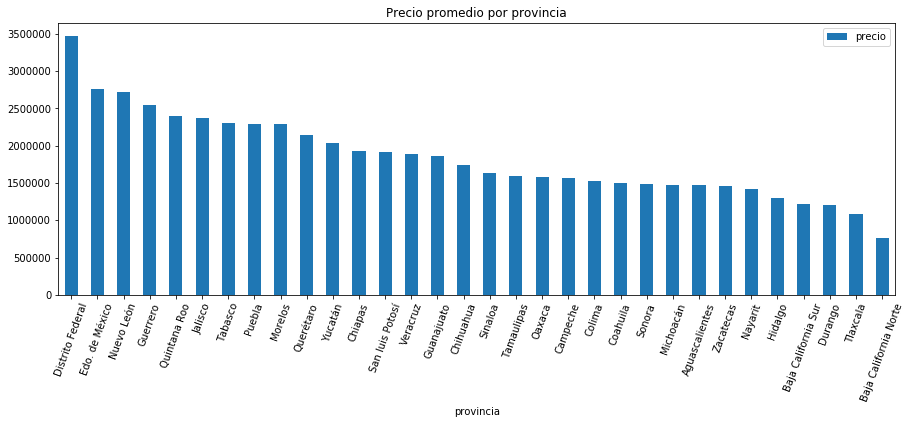

In [18]:
print(f"Promedio de precio por provincias: {df.provincia.nunique()}")
df.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia");
#grafico robado del tutorial, no cuenta 

Veamos las 5 propiedades más caras y con más metros 

In [19]:
df.nlargest(5, ['precio','metrostotales'])
#Curiosamente las 5 más caras pertenecen al distrito federal, con razón es la más cara


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
174276,153761,wtc oficina en venta piso 17,excelente oficina en venta en torre world trad...,Oficina comercial,Montecito 38,Benito Juárez,Distrito Federal,10.00,nan,0.00,...,"23,569.00",19.39,-99.17,2015-09-04 00:00:00,0.00,0.00,0.00,0.00,0.00,"12,525,000.00"
209858,181271,excelente condominio ubicado al sur de la ciud...,condominio tipo mexicano moderno de 3 casas ub...,Casa,Congreso 210,Tlalpan,Distrito Federal,0.00,3.00,nan,...,"24,763.00",19.28,-99.17,2016-10-25 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,521,000.00"
81715,64975,amsterdam town house dos niveles y terraza,proyecto de imanol legorreta y carlos duclaud ...,Apartamento,Amsterdam,Cuauhtémoc,Distrito Federal,5.00,3.00,3.00,...,"23,814.00",19.42,-99.17,2016-05-16 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,520,000.00"
192956,279973,departamento en kansas . col nápoles,"edificio de 5 niveles con 9 departamentos, ofr...",Apartamento,Kansas 167,Benito Juárez,Distrito Federal,0.00,2.00,2.00,...,"23,573.00",19.39,-99.18,2016-11-04 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,516,000.00"
232457,165404,excelente casa de lujo en venta en jardines de...,¡excelente oportunidad de inversión! nosotros ...,Casa,CASCADA #24,Alvaro Obregón,Distrito Federal,5.00,4.00,nan,...,"23,384.00",19.33,-99.20,2014-07-29 00:00:00,1.00,0.00,0.00,1.00,1.00,"12,515,000.00"


In [20]:
***************************HASTA ACA LLEGUÉ****************************************

SyntaxError: invalid syntax (<ipython-input-20-3326e2fb49e7>, line 1)

In [ ]:
#ciudades = df['ciudad']
#ciudades.value_counts()

In [ ]:
df.isnull().sum()
df.dropna(subset=['titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng'])\
.isnull().sum() #elimino los nulos, habiamos discutido si lo hacemos o no

In [ ]:
df.memory_usage() #deriamos castear datos para que ocupen menos espacio

In [ ]:
#df.astype({'gimnasio': 'category','usosmultiples': 'category','piscina': 'category','escuelascercanas': 'int32','centroscomercialescercanos': 'int32'}).dtypes


In [ ]:
#df.dtypes

In [ ]:
df.info()
#deberiamos castear datos

In [ ]:
(df.memory_usage()/(1024*1024)).sum()

In [ ]:
df.describe()

In [ ]:
#df.plot.bar('habitaciones','precio') congela la computadora


#Hacer grafico


#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
#df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70,mtitle="Cantidad de propiedades por tipo de propiedad");

In [22]:
df.groupby('precio').agg(np.sum)
#el primero elemento tiene 1400 años de antiguedad, raro

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos
precio,,,,,,,,,,,,,,,
"310,000.00",40233830,"1,466.00",447.00,224.00,238.00,"13,300.00","18,538.00","65,878,998.00","2,822.06","-12,610.09",1.00,4.00,2.00,126.00,103.00
"310,600.00",252823,0.00,2.00,0.00,1.00,42.00,68.00,0.00,19.76,-101.20,0.00,0.00,0.00,0.00,0.00
"310,808.00",254621,0.00,0.00,0.00,1.00,50.00,105.00,"252,563.00",32.49,-116.99,0.00,0.00,0.00,0.00,0.00
"311,000.00",911180,5.00,13.00,4.00,6.00,372.00,586.00,"606,146.00",132.84,-604.55,1.00,3.00,0.00,5.00,5.00
"311,250.00",17629,0.00,2.00,0.00,1.00,85.00,91.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"311,300.00",204534,0.00,5.00,1.00,3.00,304.00,126.00,"35,100.00",61.19,-210.78,0.00,0.00,0.00,0.00,0.00
"311,440.00",142752,5.00,2.00,1.00,1.00,52.00,0.00,"57,506.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"311,500.00",4358,1.00,2.00,1.00,1.00,50.00,0.00,"58,274.00",19.66,-99.01,1.00,1.00,0.00,1.00,1.00
"312,000.00",2221583,43.00,24.00,9.00,13.00,989.00,726.00,"1,101,986.00",83.30,-395.73,0.00,0.00,1.00,5.00,4.00


In [23]:
df3 = df.loc[df.antiguedad > 100.00]
#40233830
df3.head() #arriba aparece pero aca no, doble raro

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio


In [ ]:
# agrupando usando multiples columnas
grouped = df.groupby(['provincia','ciudad'])\
    .agg({'habitaciones':['mean','sum'],'precio':'mean', 'antiguedad':'mean'}) #poner parametros mas
                                                            #interesantes que habitaciones y antiguedad
grouped

In [25]:
df2 = df.loc[df.tipodepropiedad == 'Apartamento']
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57341 entries, 0 to 239999
Data columns (total 23 columns):
id                            57341 non-null int64
titulo                        56119 non-null object
descripcion                   57026 non-null object
tipodepropiedad               57341 non-null object
direccion                     47851 non-null object
ciudad                        57264 non-null object
provincia                     57300 non-null object
antiguedad                    48290 non-null float64
habitaciones                  56347 non-null float64
garages                       53605 non-null float64
banos                         56004 non-null float64
metroscubiertos               56518 non-null float64
metrostotales                 29348 non-null float64
idzona                        52779 non-null float64
lat                           30035 non-null float64
lng                           30035 non-null float64
fecha                         57341 non-null objec

In [26]:
df2.shape

(57341, 23)

In [ ]:
#fecha, fecha de que? de que se puso a la venta? de que se compró? o que? 

In [ ]:
#relacion entre latitud y longitud con el precio

In [ ]:
#comparacion entre el precio de las casas y los departamentos

In [ ]:
#

In [ ]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipodepropiedad', data=df, order=df['tipodepropiedad'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Tipo de propiedades", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Propiedades", fontsize=20)
workday_announcements.set_title("Cantidad de propiedades segun su clase", fontsize=20)

#Es un buen comienzo(?)

In [ ]:
# analicemos distribución de avisos por seniority

#seniority_types = sns.countplot(x='ciudad', data=df, order=df['ciudad'].value_counts().index, orient='v')
#seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
#seniority_types.set_xlabel("Ciudades", fontsize=20)
#seniority_types.set_ylabel("Cantidad de propiedades por ciudad", fontsize=20)
#seniority_types.set_title("Propiedades por ciudad", fontsize=20)

#Horrible

NameError: name 'plt' is not defined

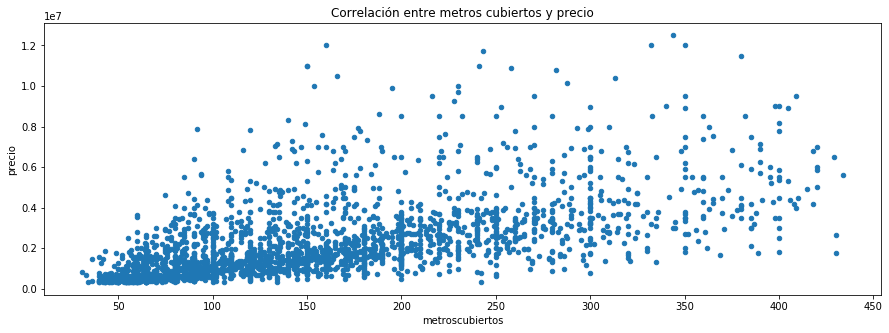

In [21]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);
